       City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199
<class 'pandas.core.series.Series'>
<type 'str'>
       City name  Population  Area square miles  Population density
0  San Francisco      852469              46.87        18187.945381
1       San Jose     1015785             176.53         5754.177760
2     Sacramento      485199              97.92         4955.055147
       City name  Population  Area square miles  Population density  \
0  San Francisco      852469              46.87        18187.945381   
1       San Jose     1015785             176.53         5754.177760   
2     Sacramento      485199              97.92         4955.055147   

  Is wide and has saint name  
0                      False  
1                       True  
2                      False  
RangeIndex(start=0, stop=3, step=1)
RangeIndex(start=0, stop=3, step=1)
       City name  Population  Area square miles  Population density  \
0  San Fran

AttributeError: 'module' object has no attribute 'plotting'

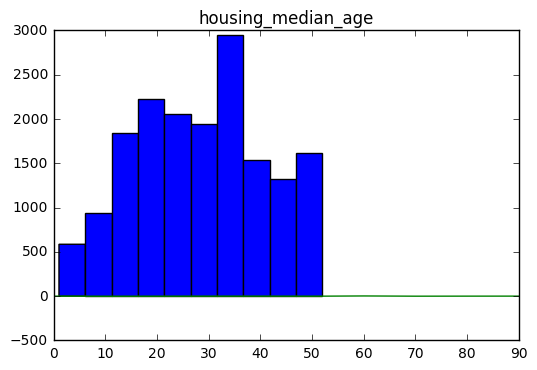

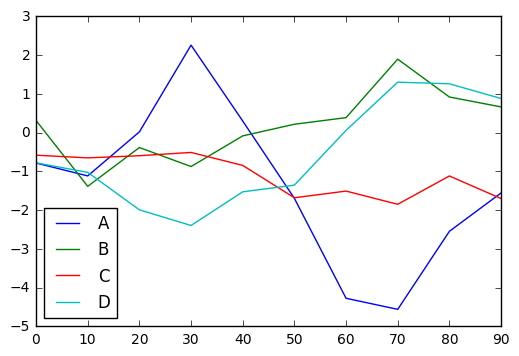

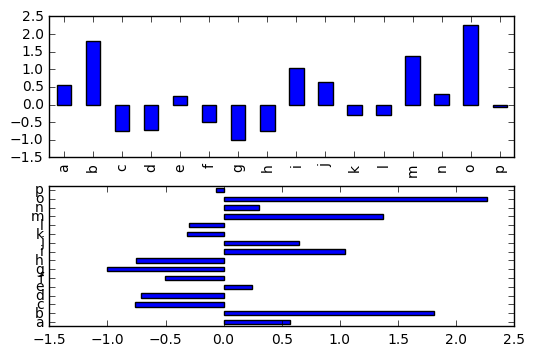

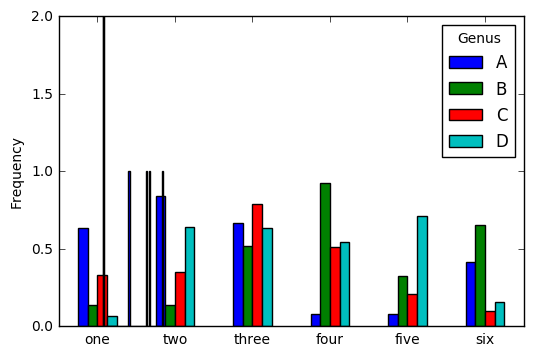

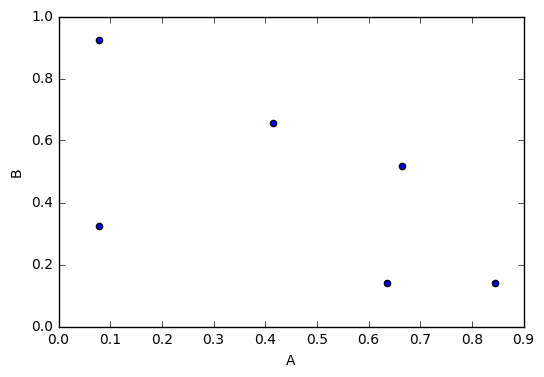

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

city_names=pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population=pd.Series([852469, 1015785, 485199])
cities=pd.DataFrame({'City name': city_names, 'Population': population})
print  cities
print type(cities['City name'])
print type(cities['City name'][1])
population / 1000
np.log(population)
population.apply(lambda val: val > 1000000)
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
print cities
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
print cities
print city_names.index
print cities.index
cities.reindex([2, 0, 1])
cities.reindex(np.random.permutation(cities.index))
print cities

california_housing_dataframe=pd.read_csv("https://download.mlcc.google.cn/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()
california_housing_dataframe.head()
california_housing_dataframe.hist('housing_median_age')
#--------------------绘图-----------------------------
s=pd.Series(np.random.randn(10),index=np.arange(0,100,10))
s.plot()
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),index = np.arange(0,100,10),columns=['A',"B","C","D"])
df.plot()
#绘制柱状图
data = pd.Series(np.random.randn(16),index=list('abcdefghijklmnop'))
#两行一列的子图
fig,axes = plt.subplots(2,1)
#ax为图表显示的位置，kind为bar，柱状图
data.plot(ax=axes[0],kind='bar')
#kind为barh，横向柱状图
data.plot(ax=axes[1],kind='barh')
df = pd.DataFrame(np.random.rand(6,4),index=['one','two','three','four','five','six'],columns=pd.Index(['A','B','C','D'],name="Genus"))
#绘制柱状图
df.plot(kind='bar')
#绘制直方图
df.A.plot(kind='hist',bins=50)
 
#散点图
df.plot.scatter('A','B')
#混合散点图，数据维度越大，越复杂
pd.plotting.scatter_matrix(df,color='g',alpha=0.3)
#--------------------绘图-----------------------------

      AT      V       AP     RH      PE
0   8.34  40.77  1010.84  90.01  480.48
1  23.64  58.49  1011.40  74.20  445.75
2  29.74  56.90  1007.15  41.91  438.76
3  19.07  49.69  1007.22  76.79  453.09
4  11.80  40.66  1017.13  97.20  464.43
         AT      V       AP     RH      PE
9563  15.12  48.92  1011.80  72.93  462.59
9564  33.41  77.95  1010.30  59.72  432.90
9565  15.99  43.34  1014.20  78.66  465.96
9566  17.65  59.87  1018.58  94.65  450.93
9567  23.68  51.30  1011.86  71.24  451.67
(9568, 5)
(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)
[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]
MSE: 20.08040120207389
RMSE: 4.481116066570235
MSE: 23.208907470136243
RMSE: 4.8175623991948715
MSE: 20.7955974619431
RMSE: 4.560219014690314


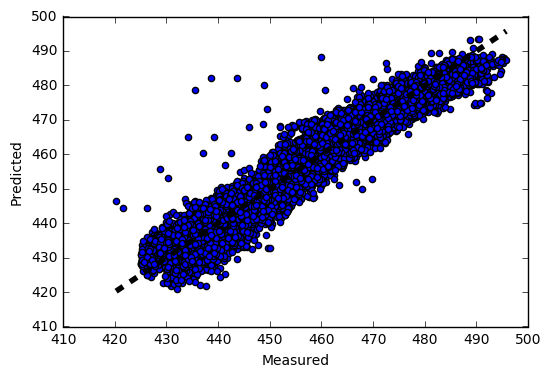

In [12]:
#线性回归
#参考https://www.cnblogs.com/pinard/p/6016029.html
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

#数据的介绍在这： http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
#数据的下载地址在这： http://archive.ics.uci.edu/ml/machine-learning-databases/00294/
data=pd.read_csv('F:\dataset\CCPP\CCPP\CCPP.csv')
print data.head()
print data.tail()
print data.shape

#样本特征
X=data[['AT', 'V', 'AP', 'RH']]
X.head()
y=data[['PE']]
y.head()
#划分训练集和测试集，可以看到75%的样本数据被作为训练集，25%的样本被作为测试集。
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

#训练模型,cikit-learn的线性回归算法使用的是最小二乘法来实现的。
linreg=LinearRegression()
linreg.fit(X_train,y_train)
#这样我们就得到了在步骤1里面需要求得的5个值。也就是说PE和其他4个变量的关系如下：
#PE=447.06297099−1.97376045∗AT−0.23229086∗V+0.0693515∗AP−0.15806957∗RH
print linreg.intercept_
print linreg.coef_

#我们需要评估我们的模型的好坏程度，对于线性回归来说，我们一般用均方差（Mean Squared Error, MSE）或者均方根差(Root Mean Squared Error, RMSE)在测试集上的表现来评价模型的好坏。
#模型拟合测试集
y_pred=linreg.predict(X_test)
#得到了MSE或者RMSE，如果我们用其他方法得到了不同的系数，需要选择模型时，就用MSE小的时候对应的参数。
print "MSE:",metrics.mean_squared_error(y_test,y_pred)
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred))

#改变因变量，训练模型。我们用AT， V，AP这3个列作为样本特征。不要RH， 输出仍然是PE。代码如下：
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#我们可以通过交叉验证来持续优化模型，代码如下，我们采用10折交叉验证
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
predicted = cross_val_predict(linreg, X, y, cv=10)
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y, predicted)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted))
#画图
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [7]:
import sklearn
print sklearn.__version__
from sklearn.cross_validation import train_test_split

0.20.3


ImportError: No module named cross_validation